In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
train_participants_path=r"C:\Users\chemm\OneDrive\Bureau\cours\MOSEF\Machine Learning\brain_anatomy_schizophrenia_IMSD-GRA-MOSEF_2024\data\train_participants.csv"
# Load and analyze the train_participants dataset
train_participants = pd.read_csv(train_participants_path)

# Overview of the dataset
train_participants_overview = {
    "columns": train_participants.columns.tolist(),
    "shape": train_participants.shape,
    "class_distribution": train_participants['diagnosis'].value_counts() if 'diagnosis' in train_participants.columns else "No diagnosis column"
}

# Display summary of the train participants dataset
train_participants_overview


{'columns': ['participant_id',
  'session',
  'sex',
  'age',
  'diagnosis',
  'study',
  'site',
  'TIV',
  'CSF_Vol',
  'GM_Vol',
  'WM_Vol'],
 'shape': (410, 11),
 'class_distribution': diagnosis
 control          222
 schizophrenia    188
 Name: count, dtype: int64}

In [5]:
train_participants.head()

,participant_id,session,sex,age,diagnosis,study,site,TIV,CSF_Vol,GM_Vol,WM_Vol
0,CH7098a,V1,0.0,20.0,schizophrenia,SCHIZCONNECT-VIP,NU,1712.357084,375.529152,747.089338,586.391159
1,A00024535,V1,0.0,26.0,control,SCHIZCONNECT-VIP,MRN,1700.601735,399.493745,721.128411,579.446172
2,CC7563,V1,1.0,28.0,control,SCHIZCONNECT-VIP,WUSTL,1449.327365,220.825294,661.028439,566.500051
3,CC3945,V1,1.0,21.0,control,SCHIZCONNECT-VIP,WUSTL,1184.699000,201.579922,560.051329,423.016129
4,CH8853b,V1,1.0,21.0,control,SCHIZCONNECT-VIP,NU,1518.198466,291.544632,705.384606,520.807601


In [9]:
print("Colonnes disponibles :", train_participants.columns.tolist())

# Vérifier la distribution des classes
if 'diagnosis' in train_participants.columns:
    print("Répartition des classes :")
    print(train_participants['diagnosis'].value_counts())

Colonnes disponibles : ['participant_id', 'session', 'sex', 'age', 'diagnosis', 'study', 'site', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']
Répartition des classes :
diagnosis
control          222
schizophrenia    188
Name: count, dtype: int64


In [7]:
# Résumer les statistiques descriptives
print("Statistiques descriptives :")
train_participants.describe(include='all')

Statistiques descriptives :


,participant_id,session,sex,age,diagnosis,study,site,TIV,CSF_Vol,GM_Vol,WM_Vol
count,410,410,410.000000,410.000000,410,410,410,410.000000,410.000000,410.000000,410.000000
unique,410,1,NaN,NaN,2,1,3,NaN,NaN,NaN,NaN
top,NM1037,V1,NaN,NaN,control,SCHIZCONNECT-VIP,WUSTL,NaN,NaN,NaN,NaN
freq,1,410,NaN,NaN,222,410,215,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.373171,33.068293,NaN,NaN,NaN,1426.838006,284.925073,625.844300,515.021569
std,NaN,NaN,0.484238,12.562225,NaN,NaN,NaN,151.554651,71.145473,74.888798,64.142373
min,NaN,NaN,0.000000,15.000000,NaN,NaN,NaN,1071.499793,144.985388,428.563675,365.082239
25%,NaN,NaN,0.000000,22.000000,NaN,NaN,NaN,1326.859179,230.153254,570.111862,472.678247
50%,NaN,NaN,0.000000,29.000000,NaN,NaN,NaN,1418.188807,276.078037,622.347001,508.949562
75%,NaN,NaN,1.000000,43.000000,NaN,NaN,NaN,1531.112130,325.382134,679.384591,559.481362


In [12]:
"""participant_id :Identifiant unique pour chaque participant.

session :Indique probablement une session d’étude (toutes marquées comme V1 ici, donc pas discriminante).

sex :Codé binaire : 0 pour un sexe et 1 pour l'autre (non précisé mais souvent 0 = femme, 1 = homme).

age :Âge des participants, allant de 15 à 65 ans.

diagnosis :Variable cible indiquant si le participant est un contrôle (control) ou diagnostiqué schizophrène (schizophrenia).

study :Nom de l'étude (unique : "SCHIZCONNECT-VIP").

site :Le lieu de l’étude (3 sites différents).

TIV, CSF_Vol, GM_Vol, WM_Vol :Mesures anatomiques cérébrales :
    TIV : Volume intracrânien total.
    CSF_Vol : Volume de liquide céphalorachidien.
    GM_Vol : Volume de matière grise.
    WM_Vol : Volume de matière blanche."""

'participant_id :Identifiant unique pour chaque participant.\n\nsession :Indique probablement une session d’étude (toutes marquées comme V1 ici, donc pas discriminante).\n\nsex :Codé binaire : 0 pour un sexe et 1 pour l\'autre (non précisé mais souvent 0 = femme, 1 = homme).\n\nage :Âge des participants, allant de 15 à 65 ans.\n\ndiagnosis :Variable cible indiquant si le participant est un contrôle (control) ou diagnostiqué schizophrène (schizophrenia).\n\nstudy :Nom de l\'étude (unique : "SCHIZCONNECT-VIP").\n\nsite :Le lieu de l’étude (3 sites différents).\n\nTIV, CSF_Vol, GM_Vol, WM_Vol :Mesures anatomiques cérébrales :\n    TIV : Volume intracrânien total.\n    CSF_Vol : Volume de liquide céphalorachidien.\n    GM_Vol : Volume de matière grise.\n    WM_Vol : Volume de matière blanche.'

In [ ]:
"""Répartition des classes
Control : 222 participants (54.1 %).
Schizophrenia : 188 participants (45.9 %).
L'ensemble est assez équilibré, ce qui est favorable pour la modélisation."""

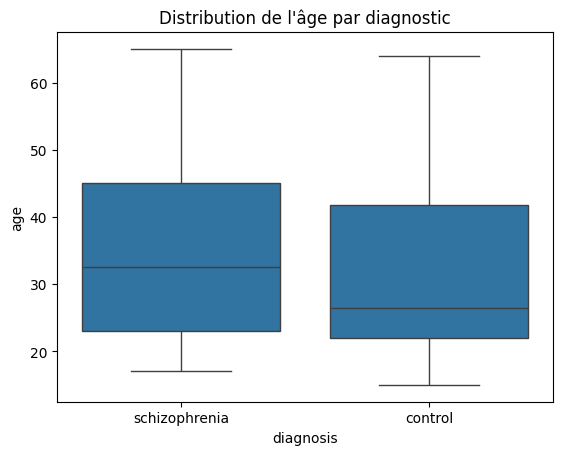

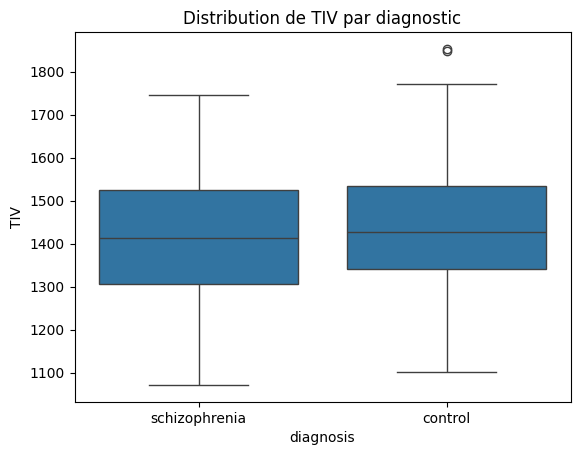

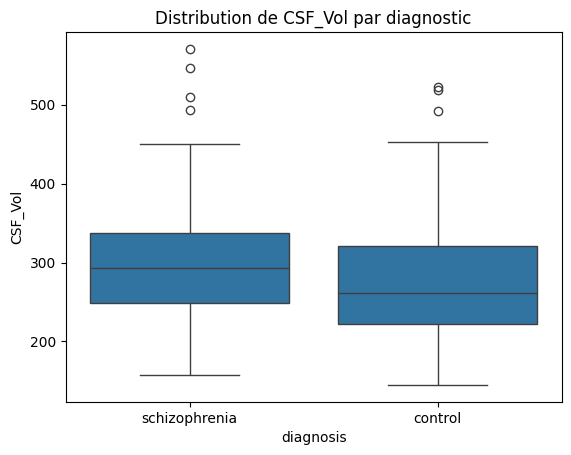

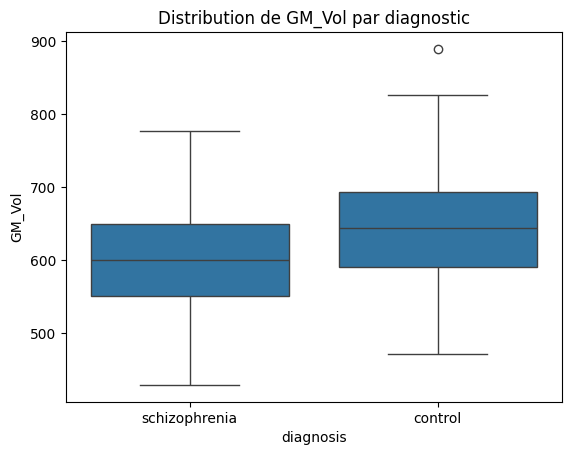

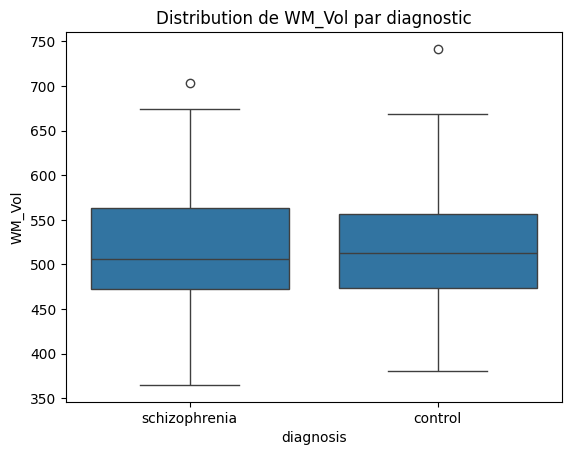

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution de l'âge par diagnostic
sns.boxplot(x='diagnosis', y='age', data=train_participants)
plt.title("Distribution de l'âge par diagnostic")
plt.show()

# Distribution des volumes cérébraux
volumes = ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']
for vol in volumes:
    sns.boxplot(x='diagnosis', y=vol, data=train_participants)
    plt.title(f"Distribution de {vol} par diagnostic")
    plt.show()


In [14]:
"""Distribution de l'âge par diagnostic
Impact potentiel : L'âge ne semble pas être un prédicteur majeur pour différencier les deux groupes.
"""

"""Distribution de TIV (Volume intracrânien total)
Impact potentiel : TIV pourrait ne pas être discriminant
"""

"""Distribution de CSF_Vol (Volume de liquide céphalorachidien)
Une légère différence est visible, avec un volume de CSF un peu plus élevé en moyenne chez les participants control.
Impact potentiel : Cette caractéristique pourrait apporter une certaine information au modèle.
"""

""" Distribution de GM_Vol (Volume de matière grise)
Le groupe control a un volume de matière grise significativement plus élevé que le groupe schizophrenia.
Impact potentiel : Le volume de matière grise semble être un prédicteur important pour différencier les deux groupes.
"""

""" Distribution de WM_Vol (Volume de matière blanche)
Distribution de WM_Vol (Volume de matière blanche)
Impact potentiel : Cette variable pourrait avoir un impact limité pour discriminer les deux groupes.
"""

"\nImpact potentiel : L'âge ne semble pas être un prédicteur majeur pour différencier les deux groupes.\n"

In [15]:
from scipy.stats import ttest_ind

variables = ['TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']
for var in variables:
    t_stat, p_val = ttest_ind(
        train_participants[train_participants['diagnosis'] == 'control'][var],
        train_participants[train_participants['diagnosis'] == 'schizophrenia'][var]
    )
    print(f"{var} : t-stat={t_stat:.2f}, p-val={p_val:.4f}")


TIV : t-stat=1.45, p-val=0.1488
CSF_Vol : t-stat=-3.37, p-val=0.0008
GM_Vol : t-stat=5.86, p-val=0.0000
WM_Vol : t-stat=0.56, p-val=0.5725


In [16]:
""" TIV (Volume intracrânien total) 
La p-value est supérieure à 0.05, ce qui signifie qu'il n'y a pas de différence statistiquement significative entre les deux groupes.
Conclusion : TIV ne semble pas être un bon prédicteur.
"""

"""CSF_Vol (Volume de liquide céphalorachidien)
La p-value est inférieure à 0.05, indiquant une différence significative entre les groupes.
Conclusion : CSF_Vol peut être un prédicteur pertinent.
"""

"""GM_Vol (Volume de matière grise)
La p-value est extrêmement significative, confirmant une différence marquée entre les deux groupes.
Conclusion : GM_Vol semble être le prédicteur le plus important.
"""

"""WM_Vol (Volume de matière blanche)
La p-value est supérieure à 0.05, indiquant qu'il n'y a pas de différence significative entre les groupes.
Conclusion : WM_Vol n'est probablement pas discriminant.
"""

"WM_Vol (Volume de matière blanche)\nLa p-value est supérieure à 0.05, indiquant qu'il n'y a pas de différence significative entre les groupes.\nConclusion : WM_Vol n'est probablement pas discriminant.\n"

In [17]:
""" 
Synthèse des résultats
Parmi les variables analysées :

Prédicteurs pertinents : CSF_Vol et GM_Vol.
Prédicteurs moins pertinents : TIV et WM_Vol
"""

' \nSynthèse des résultats\nParmi les variables analysées :\n\nPrédicteurs pertinents : CSF_Vol et GM_Vol.\nPrédicteurs moins pertinents : TIV et WM_Vol\n'

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Préparation des données
X = train_participants[['age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']]
y = (train_participants['diagnosis'] == 'schizophrenia').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modélisation
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Évaluation
y_pred = model.predict_proba(X_test)[:, 1]
print("ROC-AUC :", roc_auc_score(y_test, y_pred))


ROC-AUC : 0.7543750000000001


In [19]:
# Sélection des variables pertinentes
X = train_participants[['age', 'CSF_Vol', 'GM_Vol']]
y = (train_participants['diagnosis'] == 'schizophrenia').astype(int)

# Modélisation (exemple avec régression logistique)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]

print("ROC-AUC :", roc_auc_score(y_test, y_pred))


ROC-AUC : 0.6643749999999999


In [23]:
X = train_participants[['age', 'CSF_Vol', 'GM_Vol']]
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)
print("ROC-AUC après optimisation :", grid_search.best_score_)


Meilleurs paramètres : {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
ROC-AUC après optimisation : 0.6965708864190837


In [24]:
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
print("ROC-AUC avec régularisation :", roc_auc_score(y_test, y_pred))


ROC-AUC avec régularisation : 0.695


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_auc_score

# 1. Sélection des variables pertinentes
X = train_participants[['age', 'CSF_Vol', 'GM_Vol']]
y = (train_participants['diagnosis'] == 'schizophrenia').astype(int)

# 2. Normalisation des variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split des données (train/test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Régression logistique de base (avec régularisation L2)
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]

print("ROC-AUC (logistique avec L2, normalisation) :", roc_auc_score(y_test, y_pred))

# 5. Régression logistique avec transformation polynomiale
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model_poly = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
model_poly.fit(X_train_poly, y_train_poly)
y_pred_poly = model_poly.predict_proba(X_test_poly)[:, 1]

print("ROC-AUC (logistique avec transformation polynomiale) :", roc_auc_score(y_test_poly, y_pred_poly))

# 6. Comparaison des coefficients pour interprétation
feature_names = poly.get_feature_names_out(train_participants[['age', 'CSF_Vol', 'GM_Vol']].columns)
coefficients = model_poly.coef_[0]

# Afficher les 10 prédicteurs les plus importants
import pandas as pd
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', key=abs, ascending=False).head(10)
print(coef_df)


ROC-AUC (logistique avec L2, normalisation) : 0.66375
ROC-AUC (logistique avec transformation polynomiale) : 0.68125
          Feature  Coefficient
2          GM_Vol    -0.774216
1         CSF_Vol     0.537851
4     age CSF_Vol    -0.473028
5      age GM_Vol     0.374678
0             age    -0.264162
3           age^2     0.256573
8        GM_Vol^2     0.217833
7  CSF_Vol GM_Vol    -0.215844
6       CSF_Vol^2    -0.013848


In [28]:
from sklearn.model_selection import GridSearchCV

# Définir une grille de paramètres
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser la recherche
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

# Exécuter la recherche
grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Réévaluation du modèle avec les meilleurs paramètres
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict_proba(X_test)[:, 1]
print("ROC-AUC après optimisation :", roc_auc_score(y_test, y_pred_best))


Meilleurs paramètres : {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
ROC-AUC après optimisation : 0.72375


ROC-AUC ajusté sur le test : 0.7468750000000001
ROC-AUC moyen (10 folds) : 0.7082969280909783
Scores en validation croisée : [0.67703349 0.79665072 0.79425837 0.67942584 0.57416268 0.75119617
 0.75358852 0.63636364 0.66666667 0.75362319]


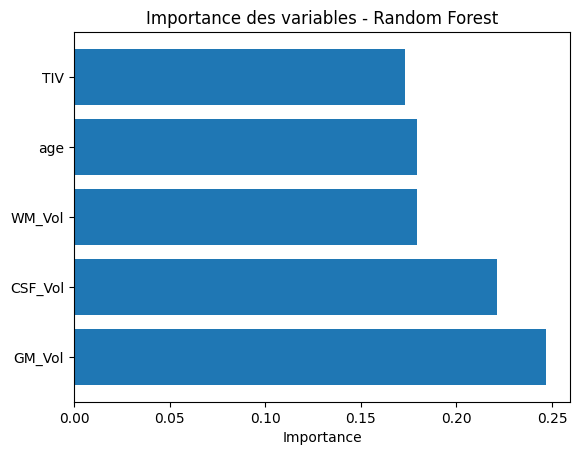

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt

# Préparation des données
X = train_participants[['age', 'TIV', 'CSF_Vol', 'GM_Vol', 'WM_Vol']]
y = (train_participants['diagnosis'] == 'schizophrenia').astype(int)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle ajusté avec paramètres légèrement moins restrictifs
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,  # Ajusté pour moins de régularisation
    min_samples_leaf=2,  # Ajusté pour moins de régularisation
    random_state=42
)
model.fit(X_train, y_train)

# Évaluation sur le jeu de test
y_pred = model.predict_proba(X_test)[:, 1]
print("ROC-AUC ajusté sur le test :", roc_auc_score(y_test, y_pred))

# Validation croisée pour évaluer la robustesse
cv_scores = cross_val_score(
    model, X, y, cv=10, scoring='roc_auc'
)
print("ROC-AUC moyen (10 folds) :", cv_scores.mean())

print("Scores en validation croisée :", cv_scores)

# Importance des variables
feature_importances = model.feature_importances_
features = X.columns

# Visualisation de l'importance des variables
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Importance des variables - Random Forest')
plt.show()


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict_proba(X_test)[:, 1]
print("ROC-AUC (Gradient Boosting) :", roc_auc_score(y_test, y_pred_gb))


ROC-AUC (Gradient Boosting) : 0.715625
